
# CS110 Fall 2019 - Assignment 3
# Decoding relationships between genes

## Submission Materials
Your assignment submission needs to include the following resources:

1. A PDF file must be the first resource and it will include all the answers to the questions above. 
2. Name the  PDF file: `<your_ name>.pdf`. For example, if you are a student name Dumbledore, your PDF file must be named “Dumbledore.pdf”. 
3. Make sure that you submit a neat, clearly presented, and easy-to-read PDF,  
4. Your PDF **must also** include the Python code as an appendix at the end. This will facilitate the process of writing feedback by anchoring the feedback to specific portions of the Python code using the grader tool.
5. Your second resource must be a single Python/Jupyter Notebook with your answers written in the assignment template provided.
    * Name this Jupyter Notebook also using the same convention as for the PDF file;  <student_name>.ipynb. For example, if you’re Dumbledore, your  Jupyter Notebook must be named “Dumbledore.ipynb”. 

## Notes on Grading Rubrics
* This is a strictly individual assignment. Everything you submit must reflect your own writing both in the text and Python programming.
* The assignment will be graded on the quality of your report, as well as: 
    * the LOs tagged in each question. 
    * the HCs **#professionalism** and **#algorithms** based on a holistic view of the assignment.

Please consult the rubrics for these LOs to optimally align your approach to the rubrics.
* As per the course’s policy on the syllabus, you will need to footnote at least **three** HCs by including a meaningful justification of the application of each HC. 
You will need to mindfully address how the HC enabled you to complete part of your work on this assignment. Please refer to refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work.
* You will receive a warning on the first two weak applications of the HCs used in assignments since the beginning of the course. The counting system is cumulative, and these first two warnings will not generate a grade on the HC. The third and subsequent warnings will be graded on the specific HC using the HCs corresponding rubric. Please check what your HC counter is and prepare accordingly for this assignment.


## Overview
Gene Mutation is a prevailing and computationally intensive research topic in Genetics. For this assignment, assume that you have been hired by a biotechnology company to work on a gene mutation research project, and your first task is to write a Python program to investigate a genealogical mutation sequencing.


In this program, a gene is described by a string of letters, with a letter being chosen from the set ${A, C, G, T}$. A mutation is relatively rare but it can occur in which there is a small probability of either inserting a new character, deleting an existing character, or changing to a new character randomly. We can refer to these probabilities by $p_i, p_d$, and $p_c$, respectively.


Now, suppose the starting point is a given string that undergoes a mutation process. This mutation created two other strings, the child strings of the first string. Each of these two new strings can undergo mutations by which they will change from their parent. In turn, the two-child strings, mutate and create 2 new substrings each, resulting in four grandchild strings from the original gene sequencing string. We can easily visualize the sequence of mutations if we were to draw a genealogy binary tree relating strings to their parent and grandparent strings.

As a result of these mutations, we now have 7 strings but unfortunately, the order of the strings has been lost due to a glitch in the gene sequencing generation program. Therefore, your first task in the project is to recover the genealogy tree for the following set of 7 strings labelled with lowercase letters:


`('a','ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT')`,
`('b','CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG')`,
`('c','TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT')`,
`('d','AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA')`,
`('e','GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC')`,
`('f','ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG')`,
`('g','ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG')`

Henceforth, the set of strings created with the gene-sequencing generation program will be referred to as `Set_Strings`.

# Assignment Questions

Each of the questions below will be graded on the CS110 LOs included inside square brackets: 

## Part A [#responsibility] [appropriate LO for the make-up work] 

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to session 12.2 (inclusively).

Submit this screenshot as a PNG file on your Python or Jupyter notebook. 


## Part B. Consider `Set_Strings` to answer the following questions below:

### Question 1. [#DynamicProgramming, #PythonProgramming, #CodeReadability] 

Write Python code which, given any two arbitrary strings, outputs the length of the Longest Common Subsequence (LCS) for those two strings. Make sure to include a number of test cases that demonstrate that your code is correct.


### Importing Packages

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import math

### String List, Headers List, and Lengths of the Strings

In [4]:
# Creating a list with the strings. 
Set_strings = ('a','ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT'), ('b','CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'), ('c','TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'), ('d','AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'), ('e','GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC'), ('f','ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG'), ('g','ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG')
headers = ["a", "b", "c", "d", "e", "f", "g"]

# Determining the length of each string as this is useful for later analysis. 
for string in Set_strings:
    print("String:", string[0], "length =", len(string[1]))

String: a length = 64
String: b length = 74
String: c length = 81
String: d length = 75
String: e length = 98
String: f length = 95
String: g length = 50


### LCS Code

In [5]:
def longestCommonSubsequence(x, y):
    """
    Gives the length of the longest common substring between strings x and y
    
    Inputs:
    - x, y: strings
    """
    
    # Using the bottom up dynamic programming implementation.
    
    # Finding the length of each string.
    m = len(x)
    n = len(y)
    
    # Table for the results. 
    tab = [[None for x in range(n + 1)] for y in range(m + 1)]
    
    # Checking if either of the string has a length of zero. Since, there cannot be a subsequence if either has no characters. 
    if m == 0 or n == 0:
        return 0

    # Going through each "cell" in the table.
    for i in range(m + 1):
        for j in range(n + 1):
            
            # We store 0 in the first row and column as they represent an empty string. 
            if i == 0 or j == 0:
                tab[i][j] = 0
            
            # If the characters match, we move north-west in table and store that value + 1 at the current index.
            elif x[i - 1] == y[j - 1]:
                tab[i][j] = tab[i - 1][j - 1] + 1
            
            # Otherwise, we find the max between the left or the top table value and store that value at the current index.             
            else:
                tab[i][j] = max(tab[i - 1][j], tab[i][j - 1])
    
    # Return the length of the longest common subsequence, which is stored at tab[m][n].
    return tab[m][n]
    
    #raise NotImplementedError()

# One string is empty.
assert(longestCommonSubsequence('', 'BDCABA')==0)

# Both strings are empty.
assert(longestCommonSubsequence('', '')==0)

# Sequences with no common subsequence. 
assert(longestCommonSubsequence('DFEF', 'JUHG')==0)

# Identical sequences. 
assert(longestCommonSubsequence('DFEFF', 'DFEFF')==5)

# Different sequences + different lengths. 
assert(longestCommonSubsequence('CHTDUFG', 'CDG')==3)

In [6]:
assert(longestCommonSubsequence('ABCBDAB', 'BDCABA')==4)

### Question 2. [#DynamicProgramming] 

How many LCSs are there in Set_Strings? Generate the matrix of the lengths of the LCS for every pair of strings in Set_Strings. The matrix should be cast as a two-dimensional numpy array. **Store this 2D numpy array to a variable named `C`**.

Your 2D array `C` should have dimension (7,7) and `C[i,j]` should give the length of the LCS for the $i-$th and $j-$th strings. For example, `C[0,3]` gives the length of the LCS for string `a` and string `d`.

### 2D Numpy Array - Length Matrix

In [7]:
def table_generator(strings):

    # Finding the number of strings. 
    n = len(strings)
    
    # Initializing the table as an np array with dimensions (7,7) and an initial value of -1.
    table = np.full((n, n), -1)
    
    # Go through each string. 
    for i in range(n):
        
        # We start from i because we would otherwise be finding the same results twice. For example, finding the 
        # length between string a and b is the same as between b and a, which means that c[i][j] gives the same result as c[j][i].
        for j in range(i, n):
            table[i][j] = longestCommonSubsequence(strings[i][1], strings[j][1])
        
    return table

# Creating the table. 
C = table_generator(Set_strings)
C

#raise NotImplementedError()

array([[64, 45, 49, 48, 50, 48, 38],
       [-1, 74, 47, 46, 59, 58, 45],
       [-1, -1, 81, 48, 57, 57, 39],
       [-1, -1, -1, 75, 53, 54, 38],
       [-1, -1, -1, -1, 98, 61, 43],
       [-1, -1, -1, -1, -1, 95, 45],
       [-1, -1, -1, -1, -1, -1, 50]])

In [8]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 3. [#DataStructures]

Manually examine the matrix you obtained in 2, and infer the genealogical relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent and child strings), and draw the resulting genealogy binary tree associated with `Set_Strings`.


### Table with Headers

In [9]:
# Using a pandas data frame to better illustrate the table with headers for the rows and columns. 
df_1= pd.DataFrame(C, index = headers, columns = headers)
print("Figure 1: Overview of LCSs")
df_1

Figure 1: Overview of LCSs


,a,b,c,d,e,f,g
a,64,45,49,48,50,48,38
b,-1,74,47,46,59,58,45
c,-1,-1,81,48,57,57,39
d,-1,-1,-1,75,53,54,38
e,-1,-1,-1,-1,98,61,43
f,-1,-1,-1,-1,-1,95,45
g,-1,-1,-1,-1,-1,-1,50


### Sorted Relationships Based on LCS Lengths

In [10]:
# Creating a list for the relationships.
lst = []

# Turning the np array into a list. 
df_list = C.tolist()

# Creating a node/edge graph.
G = nx.Graph()

# Adding the nodes.
for i in range(len(headers)):
    G.add_node(headers[i])

# Adding the relations and weights.
for i in range(7):
    for j in range(i, 7):
        if df_list[i][j] != -1 and headers[i] != headers[j]:
                G.add_edge(headers[i], headers[j], weight=df_list[i][j])
                lst.append((headers[i], headers[j], df_list[i][j]))

# Sorting the list based on the scores.
print("Figure 2: Sorted relationships with ((row, column, LCS length)")
sorted_lst = sorted(lst, key=lambda x: x[2], reverse=True)
sorted_lst

Figure 2: Sorted relationships with ((row, column, LCS length)


[('e', 'f', 61),
 ('b', 'e', 59),
 ('b', 'f', 58),
 ('c', 'e', 57),
 ('c', 'f', 57),
 ('d', 'f', 54),
 ('d', 'e', 53),
 ('a', 'e', 50),
 ('a', 'c', 49),
 ('a', 'd', 48),
 ('a', 'f', 48),
 ('c', 'd', 48),
 ('b', 'c', 47),
 ('b', 'd', 46),
 ('a', 'b', 45),
 ('b', 'g', 45),
 ('f', 'g', 45),
 ('e', 'g', 43),
 ('c', 'g', 39),
 ('a', 'g', 38),
 ('d', 'g', 38)]

### Relationship Graph with Weighted Edges

Figure 3: Relationship Graph with Weighted Edges Based on LCS Length


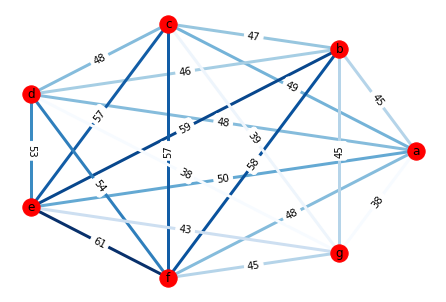

In [11]:
# Creating a graph of the relationships with weighted edges from the table using the networkx library. 
# Inspiration from: https://stackoverflow.com/questions/22967086/colouring-edges-by-weight-in-networkx?lq=1
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

# Creating the graph.
pos = nx.circular_layout(G)
nx.draw(G, pos, node_color='red', edgelist=edges, edge_color=weights, width=3, edge_cmap=plt.cm.Blues, with_labels=True)

# Setting the weight labels.
labels = nx.get_edge_attributes(G,'weight')

# Drawing it
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
print("Figure 3: Relationship Graph with Weighted Edges Based on LCS Length")
plt.show()

### Analysis

In this case, we want to use the LCS lengths to infer the relationships. However, before we try to understand the relationship between the nodes, we will have to establish some assumptions. 

We know that children strings are generated from a parent string that undergoes a mutation. Therefore, we can assume that children strings should have the highest LCS with their parent string. For example, the two children in the first generation should have the highest LCS with their parent, and the second generation children should have the highest LCS with their respective first-generation parents. This corresponds to real life, as we would usually see that e.g., grandchildren are more similar to their parents than their grandparents. 

Still, it is important to note that the relationships might not strictly follow these assumptions, as e.g., grandchildren can mutate in such a way where they are closer to a grandparent. Furthermore, since a mutation also can include insertion or deletion of additional characters, the length of the LCS might not always give the correct answer. Overall, we are only able to determine plausible relationships. 

Figure 2 shows a list of all possible relationships sorted after their LCS length. We can see that they lie within the range of (38, 61). Based on the data, we can construct a weighted edge graph to visualize the relationships, as shown in Figure 3. Each node represents a string and their edges have been colored based on the length of their common LCS (a darker color represents a longer LCS). 

From Figures 2 and 3, we can see that the longest LCSs are between b, e, and f with the three highest scores: 58, 59, 61. The graph also shows that b has less strong relationships with all other nodes besides e and f, whereas e and f have relatively strong relations with c and d. Thus, we will infer that b is the grandparent, and e and f are the parents. 

Next, we have to determine which nodes are the children of e and f. Generally, we want to maximize the overall "LCS lengths score" (sum of the LCS lengths in the final tree) as we are using this metric as a guide to determine relationships. Thus, we go through each of the remaining nodes in Figure 2 and 3 and compare their relationship with e and f:

- a & e = 50, a & f = 48
- c & e = 57, c & f = 57
- d & e = 53, d & f = 54
- g & e = 43, g & f = 45

From above, we can see that c can be paired with either e and f as both give a score of 57. For a we would maximize the score by setting it as a child of e, for d by setting it as a child of f, and for g as a child of f. Therefore, we infer that a and c are children of e whereas d and g are children of f, which gives us the tree below. 

If we calculate the overall score, we find that it is 323. Setting e as the root node and following the same process of building the tree gives a score of 321 and similar with f we get a score of 318 (and smaller scores for the rest). Thus, we should have found the tree, which maximizes the overall score. 

In [12]:
# Illustrating the final tree.
print("Figure 4: Final Inferred Relationships Between the Strings")
print("")
print("     b      ")
print("   /   \    ")
print("  e      f  ")
print(" / \    / \ ")
print("a   c  d   g")

Figure 4: Final Inferred Relationships Between the Strings

     b      
   /   \    
  e      f  
 / \    / \ 
a   c  d   g


### Question 4. [#PythonProgramming, #CodeReadability, #DynamicProgramming or #GreedyAlgorithms] 

Write an algorithm in Python for the general case, which takes as input $N$ sequencing strings and outputs a genealogy binary tree associated with the $N$ strings that best exposes the relationships between them.

### Initial Thoughts

As we are trying to maximize the overall LCS score, we could use a brute-force approach where we build all possible trees and afterward take the tree with the maximum score. However, as N increases, we would get a considerable complexity since we are checking all possible combinations. Instead, to find a plausible tree, we could use a greedy algorithm or a dynamic programming method. 

We can use the dynamic programming method because there are overlapping subproblems. For example, if we have a binary tree, flipping the left and the right branch would give us the same overall score. Similarly, if we flip two children of the same parent, the score would stay the same. Thus, we could save these subproblem results and use them when we find the overall score of other trees instead of having to calculate subproblems repeatedly. 

For the greedy algorithm, we would have to determine the best candidate for the root node and afterward choose the optimal children for each parent until we have completed the tree. Thus, when we are at a specific parent, we would find the optimal two children based on the LCS scores. 

However, there are limitations to both methods, which might lead to not finding the overall optimal solution. First, we know that optimizing a subtree might not actually optimize the whole tree: getting the highest scores for a subtree might lead to low scores in the upper part of the tree. Thus, we might have been better off spreading out the scores. Therefore, the dynamic programming criteria of optimal substructure could be violated. 

Similarly, for the greedy algorithm, choosing the optimal solution to a subproblem might lead to lower scores later, which also indicates that we would potentially only find a local optimal tree. 

Overall, the characteristics of both methods could be violated by the fact that later decisions are not always independent of earlier decisions - when we decide to place a node in the tree, we limit later options. 

With these limitations in mind, I will try to create an algorithm that uses the greedy approach. The algorithm will use the list of best relations to determine the root node because it will then gather some of the high scores in the relations list. Afterward, it will determine the two best children for the current node by looking through the LCS table, and this process will continue until we have placed all nodes in the tree. Thus, the algorithm is greedy because it makes the locally optimal choice at every stage. However, as explained above, it might not produce the global solution.

### Genealogy Binary Tree Algorithm

In [13]:
def full_table_generator(strings):
    """Generates a table with the different LCS scores, which we will use to keep track of which nodes 
    have been placed in the tree and which one might be the optimal to place next. We place 0 for 
    the LCS of a string itself."""

    # Finding the number of strings. 
    n = len(strings)
    
    # Initializing the table as an np array with dimensions (7,7) and an initial value of -1.
    table = np.full((n, n), -1)
    
    # Go through each string. 
    for i in range(n):

        for j in range(n):

            if i == j:
                
                # Place zero for the LCS of a string itself as we cannot match a string with itself in the tree. 
                table[i][j] = 0
                
            else:
                # Finding the LCS. 
                table[i][j] = longestCommonSubsequence(strings[i][1], strings[j][1])
        
    return table

def list_generator(strings):
    """Generates a list of the possible relationships between 
    the nodes sorted after their LCS length."""
    
    # Number of strings.
    n = len(strings)
    
    # List to store results.
    lst = []
    
    # Create lists with weights.
    for i in range(n):
        
        # We use i+1 to avoid checking e.g. a and a.
        for j in range(i+1, n):
            
            lst.append((i, j, longestCommonSubsequence(strings[i][1], strings[j][1])))
            
    return sorted(lst, key=lambda x: x[2], reverse=True)

def root_index(lst):
    """Determines the root by trying to use as many as the high scoring
    relations in the relations list."""
    
    # Determining the two possible roots from the list of relations. 
    root_1 = lst[0][0]
    root_2 = lst[0][1]
    
    # Finding the optimal root by going down the relations list and stopping as soon as we encounter
    # one of the possible roots. 
    for i in range(1, len(lst)):
        
        if lst[i][0] == root_1 or lst[i][1] == root_1:
            return root_1
        elif lst[i][0] == root_2 or lst[i][1] == root_2:
            return root_2

def printer(strings, n, tree):
    """Prints out the results of the tree generation function."""
    
    # Printing out the result.
    counter = 0
    
    # Finding the maximum number of levels given the number of nodes. We use the formula 1 + floor(log2(n)).
    for i in range(1 + math.floor(math.log2(n))):
        
        # Creating a list to store the elements for the current generation.
        generation = []
        
        # We find the number of nodes at the current level with the formula 2^(current level).
        for j in range(2**i):
            
            # We continue until we have all strings. 
            if counter != n:
                
                # Appending the results and increasing the counter by one to move to the next element in the tree.
                generation.append(strings[tree[counter]][0])
                counter += 1
         
        # Printing out the results.
        print("Generation", i, ":", generation)
    
def tree(strings):
    """Builds a tree from by utilizing the table and the relationship list. The output is 
    in the form of each generation and should be read from left to right (created with the
    printer function)."""

    # Number of strings.
    n = len(strings)
    
    # The number of iterations will be equal to (n-1)/2. We find the root node in one iteration and then for each subsequent
    # iteration we find 1 pair of children. E.g. if n = 7 and we find the root, then we have 7 - 1 = 6 n left. After this
    # we find a pair in each iteration, so the total number of iterations afterward is n / 2. We use the ceiling function, to ensure 
    # we do not omit elements when we a binary tree where the lowest level is not completely filled. 
    number_of_iterations = (math.ceil((n-1)/2)) 
    
    # Generate a table
    tab = full_table_generator(strings)
    
    # Generated the ranked list of relations.
    lst = list_generator(strings)
    
    # Find the root's index. 
    index = root_index(lst)
    
     # Create the tree and place the root in it.
    tree = [index] 
    
    # Go through the specified number of iterations to build the tree.
    for i in range(number_of_iterations):
        
        # Finding first max of the current node (first child).
        max_1 = max(tab[index]) 
        
        # Finding the index of the first max. 
        index_max_1 = np.where(tab[index] == max_1)[0]
        
        # Appending the node to the tree.
        tree.append(index_max_1[0]) 
        
        # Replacing the max node's index with zeroes in the table.
        tab[index][index_max_1[0]], tab[index_max_1[0]][index] = 0, 0 

        # Finding the second max (second child)
        max_2 = max(tab[index]) 
        
        # Finding the index of the second max
        index_max_2 = np.where(tab[index] == max_2)[0] 
        
        # Appending the node to the tree.
        if max_2 != 0:
            tree.append(index_max_2[0]) 
        
        # Replacing the max node's index with zeroes in the table.
        tab[index][index_max_2[0]], tab[index_max_2[0]][index] = 0, 0 
        
        # When a specific node cannot be connected to further nodes we turn its table row
        # and column into zeros.
        for j in range(n):
            tab[j][index]= 0
        
        tab[index] = [0]*n
        
        # Place zeroes in the table to ensure that two children of the same parent cannot be linked with each other.
        tab[index_max_1[0]][index_max_2[0]], tab[index_max_2[0]][index_max_1[0]] = 0, 0  
        
        # Moving to the next element in the tree to go through the next iteration and find its children.
        # This also gives the index after the parent of the current two children. 
        index = tree[i + 1]
        
        # We find the index of the last uncle in the tree of the current two children. We know that it will
        # be given by the element in the tree list before the two children.
        index_last_uncle = len(tree) - 2
        
        # Removing each child's possibility of matching with their uncle and cousins. This is done after the index is increased because
        # the root node in the begining doesn't have a parent. We will have to use tree[d] to access the index of
        # the element we want to change. 
        for d in range(index, index_last_uncle):
            tab[index_max_1[0]][tree[d]], tab[tree[d]][index_max_1[0]] = 0, 0 
            tab[index_max_2[0]][tree[d]], tab[tree[d]][index_max_2[0]] = 0, 0
        

    # Returning the tree with the indices of each string as an array that can be build as a binary tree.
    return tree

# Finding the tree.
the_tree = tree(Set_strings)

# Printing the tree with the printer function. 
printer(Set_strings, len(Set_strings), the_tree)

Generation 0 : ['e']
Generation 1 : ['f', 'b']
Generation 2 : ['c', 'd', 'a', 'g']


### Question 5. [#ComputationalCritique] 

Write any strengths or weaknesses of your suggested algorithm.


### Explanation of Algorithm
First, we generate a table of all LCS combinations (with LCS of the strings themselves set to 0). Next, we create the ranked relations list based on the LCS lengths from the table. We then have to determine the root of the tree, which is done by taking the two letters in the top pair in the relations list and going down the list until we encounter one of the letters. The letter we arrive at first becomes the root. We do so because it ensures that we utilize the top score in the relations list together with the next best score for that element. 

Now we start building the tree. Throughout the process, we change indices in the table to zero, when certain relations are no longer possible, which ensures that they will not become the max in further iterations. 

An edge case is when we have a certain number of strings, which leads to an incomplete lowest level. In this case, the algorithm would continue for non-exciting elements at the current level. However, as they are non-existing, it would find max numbers among zeroes, which is the only number left. Therefore, I have included an if statement to ensure that we only put the n strings into the list. 

After finding the root, we go to the row of the root in the table and find the two maximum LCSs and their corresponding elements, which are then set as the children. Afterward, we set the row and the column of the root equal to zeros as it now cannot be paired with any other element. Similarly, we turn the relations between the two children into zero. With further levels, when we place children, we set the relationships between children, uncles, and cousins into zero. Overall, for each iteration, we have to change indices into zero, if certain relations are no longer possible to ensure that we do not place a node several times in the tree. 

Lastly, we use the printer function to print out the relations. The output has to be read from left to right, which means that e.g., at the 2nd generation, the first element would be the child of the first element in the 1st generation. 


### Strengths

One strength of the algorithm is that it has a better complexity than the brute force approach as it does not check all possible tree combinations. Instead, it uses a greedy structure and takes advantage of the local best decisions by choosing the best children for the current parent. 

Furthermore, the algorithm does not pick the root node randomly as it uses the relations list to determine it. This also means that we utilize several of the high scores in the list, which can contribute positively to the overall score. We inferred that the grandparent should have a higher score with its children than grandchildren. Thus, by maximizing the first generation, we might also be improving further scores. 

Additionally, using the table structure ensures that elements are not being placed twice. The structure also means that when we are deciding the children for a node, we are only looping through the node's row (possible relations) and not everything.   

Another strength is that the algorithm also can be used to build a binary tree where the lowest level is not entirely filled. 

Lastly, when we input Set_strings we get a tree with an overall score of 321, which is relatively close to the score of 323 we found in question 3. From the relations table, we can see that the two max scores are used while the rest of the scores comes from the upper half. Thus, we can infer that the greedy approach achieves a plausible solution.


### Weaknesses

The main weakness of the greedy algorithm is that it might not find the global solution. For example, for Set_strings we got a score of 321 while we know that there is a potential higher score of 323. This happens because the local best decision might not lead to the overall maximum. 

Additionally, when we do not have nodes enough to fill the last level completely, some of the nodes will just be placed at the leftmost position. For example, if we added an extra string to Set_strings, the last node would be placed as a child of the leftmost string in the generation above it, although it might match better with one of the other possible nodes. Therefore, the algorithm will generally produce better results when we have enough nodes to fill the last level because it allows for comparisons for all leaves. 

Another weakness is the complexity of the algorithm (see below). Currently, we calculate the LCSs both for in the table generator and the relations list, which adds extra steps. Furthermore, we are searching for and changing indices several times. 

Overall, one of the hardest decisions is to decide how to determine the root node as we have more than one candidate. In this case, we used the relations list, but there might be a better way. However, it can be difficult to determine without the brute-force approach. 

Lastly, we might want to reconsider the definition of "similarity" between two strings. In the last question, we will look at how one could also use the edit distance as a measure to examine how similar two strings are. Thus, we might have to consider more than one factor to get a better picture of the relationship between different strings (see the last "reflection" section for further elaboration).

### Question 6. [#ComplexityAnalysis] 

What is the computational complexity of your solution to produce genealogy binary trees? You can consider M to be the length of a gene, and N the number of genes.

### Complexity

Generating a tree relies on the LCS function, where we populate the result table with two for loops. The outer one iterates M times, whereas the inner one iterates N times. Thus, the complexity of the LCS function becomes $O(M*N)$. When we use the tree function, we go through the following steps:

1. Generate the table with the LCS scores. As we have to loop through with two counters on length n, we get $O(N^2)$. For each loop, we generate the LCS, which has complexity $O(M*N)$. Overall, we then have $O(M*N^3)$ as we have to create a LCS for each iteration.

2. Next, we generate a list of the unique possible relationships between the strings sorted after their LCS score. This gives the same complexity, $O(M*N^3)$, as above, although we are only computing unique relations. Furthermore, we sort the list based on the scores, which adds an additional $O(NlogN)$ (as the Python sort function has the latter complexity). So, we have $O(M*N^3) + O(NlogN)$.

3. Afterward, we have to find the root by going down the relations list. In the worst-case we will have to traverse the whole list which has a length of approximately half of N. Thus, in the worst case we have $O(N)$ for the complexity of finding the root and overall $O(M*N^3) + O(NlogN) + O(N)$.

4. In the main function, we have to find the max for two indices, which has a complexity of $2*O(NlogN)$ (the Python max function has this complexity). Next, we have to search for numbers and replace numbers with zeroes, which all have a complexity of $O(N)$. Therefore, we get $O(NlogN) + O(N)$ for this part. Overall, we then have $O(M*N^3) + 2*O(NlogN) + 2*O(N)$.

In this case, we will neglect the print function because it is just used to provide a more visual image of our results (we could just examine the tree list). 

Thus, the complexity of the tree function is: $O(M*N^3) + O(NlogN) + O(N)$. As N gets large, we then expect the algorithm to perform poorly, especially due to the exponential value (power of three) in the first term.


### Possible Improvements

One way to improve the algorithm would be to try and combine the table and relation list generator functions because we are using similar data to generate both of them. As we iterate through the strings with two pointers and create LCS in both of them, we get $2*O(M*N^3)$. Although the multiplication of two is neglected in the overall complexity, combining them would still improve e.g., the actual run time of the program.

Furthermore, using a dynamic programming approach could potentially also improve the complexity as we might be able to have quicker lookups without having to search for and change indices. However, one would have to determine how to store the sub results in a 2D array, which can be difficult.   

### Question 7. [#ComputationalSolutions, #PythonProgramming, #CodeReadability] 

How would you estimate the probabilities of insertions, deletions, and mutations, $p_i, p_d,$ and $p_c$, respectively? (Hint: It is obvious that you don’t have enough data to obtain meaningful estimates for large datasets, but this small dataset has enough information for you to intuitively formulate estimates for $p_i, p_d,$ and $p_c$.). Make sure you include a working Python estimation that would take your algorithmic strategy into practice.

### Description

In this case, we need to estimate how many insertions, deletions, and mutations should take to transform one string into another (editing operations). One way to compute these numbers is through the minimum edit distance. The latter is the minimum number of editing operations we have to perform to transform a string into another string. 

We could try all possible ways of transforming a string into another string. For each iteration, we would move to the next elements in the two strings, and if the elements are the same, we move on. If two elements are not the same, we would recursively compute the minimum distance by considering all operations on smaller parts of the string and choose the minimum one. However, this method can yield a very high complexity. In the worst case, none of the characters of the strings would match. Then, we would consider all outcomes of the three methods, giving us $O(3^M)$. 

In the recursive method, we can see that we are checking several of the same subproblems repeatedly, resulting in the large complexity. Thus, due to the overlapping subproblem characteristic, we can instead propose an algorithm that uses dynamic programming to store the results of the subproblems:

1. Find the overall edit distance for all unique pairs of strings through with dynamic programming.
2. Find the number of insertions, deletions, and mutations between all unique pairs of strings.
3. Find the probabilities of insertion, deletion, and mutation by utilizing the data from 1 and 2. 

Thus, we will need three functions. One to find the overall edit distances, one for the count of each operation, and one to compute the percentages. Using this approach also means that we assume that nature will take the shortest path to edit the sequences from e.g., a parent to a child. 

The probabilities will be calculated by taking each parent and child pair, finding the count for each operation when transforming the parent string into the child, and then divide each count by the length of the parent string. Lastly, we can average the percentages to give us the average probability for insertion, deletion, and change per letter.  

### Algorithm to Estimate Probability of Each Operation

In [14]:
def edit_distance_table(string_1, string_2):
    """Function which finds the minimum edit distance when transforming
    string_1 to string_2."""
    
    # Finding the length of each string.
    m = len(string_1)
    n = len(string_2)
    
    # Creating a table to store the results.
    tab = [[None for x in range(n + 1)] for y in range(m + 1)]
    
    # Iterating through the table and filling it up by using the
    # bottom up method. 
    
    # The iterative variables indicates the current elements of the strings. The first row/column is
    # when the strings are empty.
    for i in range(m + 1):
        
        for j in range(n + 1):
            
            # Case 1: We have an empty string_1 and we have to insert
            # all string_2's characters. We insert the value of the current j in each
            # of the cells in the first row.
            if i == 0:    
                tab[i][j] = j
            
            # Case 2: Opposite of above. If string_2 is empty, we have to
            # remove all of its characters. 
            elif j == 0:
                tab[i][j] = i
            
            # Case 3: The current characters are the same. We use the last stored
            # result as no changes are necessary.
            elif string_1[i - 1] == string_2[j - 1]:
                tab[i][j] = tab[i - 1][j - 1]
            
            # Case 4: The characters are different. Therefore, we have to consider
            # each of the different ways to transform the string and store the minimum.
            # We also add one since we perform an operation in addition to the past stored ones.
            else:              
                                # Insertion    # Deletion     # Changing
                tab[i][j] = min(tab[i][j - 1], tab[i - 1][j], tab[i - 1][j - 1]) + 1
    
    # Return the completed table.
    return tab

def operations(string_1, string_2):
    """Function which finds the number of insertions, deletions, and chamges necessary
    to change string_1 to string_2 while adhering to the minimum edit distance. We need
    to traverse the table to find out which operations were used."""
    
    # Create the table with the function above.
    tab = edit_distance_table(string_1, string_2)

    # Finding the lengths of each string.
    m = len(string_1)
    n = len(string_2)
    
    # Initializing the counters. 
    insert, delete, change = 0, 0, 0
    
    # We keep iterating until we have checked the full length of the string.
    while m > 0 or n > 0:
        
        # If the diagonal cell is the minimum, then either a) the characters were the same
        # or b) a change was performed. The indicing in the if/elif statements respectively relate to delete, insert, change.
        if tab[m - 1][n - 1] == min(tab[m - 1][n], tab[m][n - 1], tab[m - 1][n - 1]):
            
            # If the current value is greater than the diagonal one, a change was peformed. 
            if tab[m][n] > tab[m - 1][n - 1]:
                
                change += 1
        
            # Moving to the next indices.
            n -= 1
            m -= 1
        
        # If the cell to the left is minimum, insertion was performed. 
        elif tab[m][n - 1] == min(tab[m - 1][n], tab[m][n - 1], tab[m - 1][n - 1]):
            
            insert += 1
            
            # Moving to the next n index.
            n -= 1
        
        # If the upper cell is the minimum, deletion was performed. 
        elif tab[m - 1][n] == min(tab[m - 1][n], tab[m][n - 1], tab[m - 1][n - 1]):
            
            delete += 1
            
            # Moving to the next m index.
            m -= 1
    
    # Returning the overall edit count and the number of operations.
    return [tab[len(string_1)][len(string_2)], insert, delete, change]
    

# Testing
assert(operations("ACTG", "ACGG")==[1, 0, 0, 1]) # Change
assert(operations("AAAA", "AAAAA")==[1, 1, 0, 0]) # Insert
assert(operations("GGGG", "GGG")==[1, 0, 1, 0]) # Delete
assert(operations("ACTG", "ATTGC")==[2, 1, 0, 1]) # Mixed

In [17]:
def probabilities(strings, the_tree):
    """Function which prints the probabilities of the different operations of a specific tree."""
    
    # Creating lists for probabilities. 
    mutation_prob = []
    insert_prob = []
    delete_prob = []
    change_prob = []
    
    # Go through each string in the tree. 
    for i, string in enumerate(strings):
        
        # The root node does not have a parent.
        if i != 0:
            
            # We have to find the indices in the original string list.
            parent_index = the_tree[math.floor((i - 1)/2)]
            child_index = the_tree[i]
            
            # Finding the edit distance operations when transforming the parent string into the child string.
            operation_list = operations(strings[parent_index][1], strings[child_index][1])
            
            # Finding the length of the parent string.
            len_parent = len(strings[parent_index][1])
            
            # Finding the probabilities by finding the number of each operation and dividing by the parent's
            # string length. 
            mutation_prob.append(operation_list[0] / len_parent * 100)
            insert_prob.append(operation_list[1] / len_parent * 100)
            delete_prob.append(operation_list[2] / len_parent * 100)
            change_prob.append(operation_list[3] / len_parent * 100)
    
    # Averaging the probabilities.
    avg_mutation = sum(mutation_prob) / len(mutation_prob)
    avg_insert = sum(insert_prob) / len(insert_prob)
    avg_delete = sum(delete_prob) / len(delete_prob)
    avg_change = sum(change_prob) / len(change_prob)
    
    printer(strings, len(strings), the_tree)
    print("")
    print("Between Each Parent --> Child Pair:\n")
    print("Average Probability of Insertion for One Letter: ", avg_insert, "%\nAverage Probability of Deletion for One Letter: ", avg_delete, "%\nAverage Probability of Changing for One Letter: ", avg_change, "%", "\n\nOverall Average Probability of Mutation for One Letter:", avg_mutation, "%")

# Creating a tree:
the_tree = tree(Set_strings)

# Finding the probabilities for the tree generated by the algorithm.
print("For the Algorithmic Tree:\n")
probabilities(Set_strings, the_tree)

# Creating the inferred tree [b, e, f, a, c, d, g]:
the_tree = [1, 4, 5, 0, 2, 3, 6]

# Probabilities.
print("\nFor The Inferred Tree:\n")
probabilities(Set_strings, the_tree)

For the Algorithmic Tree:

Generation 0 : ['e']
Generation 1 : ['f', 'b']
Generation 2 : ['c', 'd', 'a', 'g']

Between Each Parent --> Child Pair:

Average Probability of Insertion for One Letter:  4.070988281514597 %
Average Probability of Deletion for One Letter:  22.285394954567888 %
Average Probability of Changing for One Letter:  21.39213864777774 % 

Overall Average Probability of Mutation for One Letter: 47.74852188386023 %

For The Inferred Tree:

Generation 0 : ['b']
Generation 1 : ['e', 'f']
Generation 2 : ['a', 'c', 'd', 'g']

Between Each Parent --> Child Pair:

Average Probability of Insertion for One Letter:  11.671892085425922 %
Average Probability of Deletion for One Letter:  21.61373510997571 %
Average Probability of Changing for One Letter:  20.463562380855613 % 

Overall Average Probability of Mutation for One Letter: 53.749189576257244 %


### Results

From the data above, we can see that the probabilities for the algorithmic tree and inferred tree are:

| Probability Per Letter | Algorithmic Tree | Inferred Tree |
| :---- | :---- | :---- |
| $p_i$ | 4.07% | 11.67% |
| $p_d$ | 22.29% | 21.61% |
| $p_c$ | 21.39% | 20.46% |
| $p_{mutation}$ | 47.75% | 53.75% |

It is important to note that the probabilities are *per letter*. For example, if I have the string "ACGT" and it mutates to "TTGT" then there will be a 50% chance of change per letter (as we divide the number of changes by the number of letters in the parent string). 

### Analysis

Both trees have a higher probability of deletion compared to the probability of insertion, respectively 22.29% vs. 4.07% for the algorithmic and 21.61% vs. 11.67% for the inferred. If we examine the original strings in Set_strings, we can see that e is longest (length of 98 letters), followed by f (length of 95 letters), and both of those strings are high up in the trees. Thus, it makes sense that the probability for deletion is greater than insertion because we need to delete more letters to transform the longer strings, e and f, into their shorter children strings. 

Specifically, in the algorithmic tree, e is in the 0th generation while f is in the 1st, whereas in the inferred tree, both of them are in the 1st generation. The latter is reflected in the slightly higher $p_d$ for the algorithmic tree as the longest string, e, is placed highest in the tree. In the inferred tree, we have string b at the highest position. Thus, $p_i$ should be higher because we need to add elements to go from e.g., b to e and b to f (as b is shorter than both of them). 

However, it is essential to note that these probabilities are not very certain because we do not know for sure if we have found the original tree. Still, it is interesting to see that the probabilities for $p_d, p_c$, and $p_{mutation}$ are quite close between the algorithmic tree and inferred tree, although the root node, one of the parents and the placement of some of the children are different. 

### Reflection - Reconsidering "Similarity"

Overall, the inference from the matrix created in question did not generate the same tree as the algorithm above because the latter utilizes the greedy algorithm structure. However, both of the trees had similar probabilities for each operation. Still, it would be necessary to reconsider how we define "similarity" between strings. In our case, the two longest strings, e and f, were placed high in the tree as they had a higher LCS score. However, they were also the two longest strings. Thus, they might have a greater chance of getting a higher LCS score as they have more letters that can be matched. Therefore, it might be possible to improve the inference and algorithm by finding some way to normalize the LCS score based on the lengths of the strings. 

## References

- Colouring edges by weight in networkx. (2014, April 9). Retrieved from https://stackoverflow.com/questions/22967086/colouring-edges-by-weight-in-networkx?lq=1.

- Edit Distance: DP-5. (2019, October 17). Retrieved from https://www.geeksforgeeks.org/edit-distance-dp-5/.

- TimeComplexity. (2017, June 5). Retrieved from https://wiki.python.org/moin/TimeComplexity.